In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn import datasets
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                       columns=iris['feature_names'] + ['target'])

In [3]:
# Feature Selection
features = ['sepal length (cm)', 'sepal width (cm)']

In [4]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(iris_df[features], test_size=0.2, random_state=42)


In [5]:
# Preprocessing
def preprocess_data(data, features):
    X = data[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

In [6]:
# Train the Spectral Clustering model
def train_spectral_clustering(X, n_clusters):
    model = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors')
    labels = model.fit_predict(X)
    return model, labels

In [7]:
# Visualize the clusters
def visualize_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title(title)
    plt.show()

In [8]:
# Evaluate the clustering
def evaluate_clustering(X, labels):
    silhouette_avg = silhouette_score(X, labels)
    return silhouette_avg

In [9]:
# Preprocess the training data
X_train_scaled = preprocess_data(train_data, features)

In [10]:
# Train Spectral Clustering model
n_clusters = 3  # You can adjust the number of clusters based on your requirement
spectral_model, train_labels = train_spectral_clustering(X_train_scaled, n_clusters)

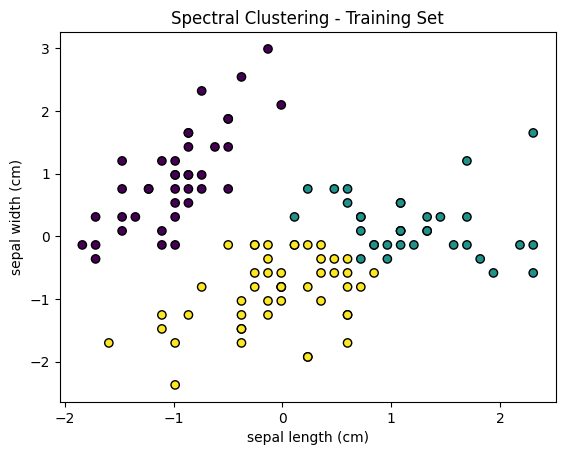

In [11]:
# Visualize clusters on the training set
visualize_clusters(X_train_scaled, train_labels, 'Spectral Clustering - Training Set')

In [12]:
# Preprocess the test data
X_test_scaled = preprocess_data(test_data, features)

In [13]:
# Predict clusters on the test set
test_labels = spectral_model.fit_predict(X_test_scaled)

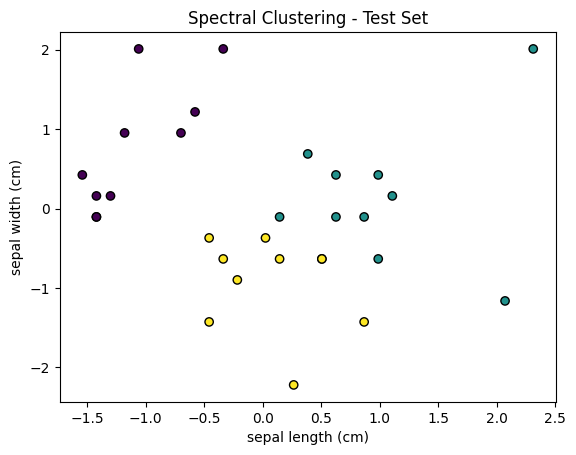

In [14]:
# Visualize clusters on the test set
visualize_clusters(X_test_scaled, test_labels, 'Spectral Clustering - Test Set')

In [15]:
# Evaluate clustering on the training set
silhouette_avg_train = evaluate_clustering(X_train_scaled, train_labels)
print(f'Silhouette Score (Training Set): {silhouette_avg_train}')

Silhouette Score (Training Set): 0.4509916340823906


In [16]:
# Evaluate clustering on the test set
silhouette_avg_test = evaluate_clustering(X_test_scaled, test_labels)
print(f'Silhouette Score (Test Set): {silhouette_avg_test}')

Silhouette Score (Test Set): 0.36520493218160527
